# Autonomous CV Project

In this project, you will work on a computer vision task for autonomous driving. This project will guide you through the steps of preparing the data, building a deep learning model, training the model, and making predictions.

## Project Steps Overview:
1. **Data Preprocessing:** Load and preprocess the image data.
2. **Data Augmentation:** Apply augmentation techniques to increase the dataset variability.
3. **Model Building:** Define the CNN architecture using a deep learning framework.
4. **Model Training:** Train the CNN model with the prepared data.
5. **Prediction:** Use the trained model to make predictions on test data.

Let's get started! Provided below is some code to help you get set up with the data and imports.

### Importing Libraries
First, import the necessary libraries for data manipulation, visualization, and model building.

# Summary
This is a traffic signs dedictor project. That classifies among 43 categories of traffic signs. I tried two deep learning models: tensorflow and pytorch. The validation accuracy of tensorflow model is 83.97%. The validation accuracy of pytorch is 97.1. I did data augmentation before both models.


In [1]:
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# get files name
import os

In [2]:
IMG_SIZE = 32 # pixxilating the image 


# add paths
DATADIR = "Train"
CATEGORIES = []
CATEGORIES_TEST = []


DATADIR_TEST = "test"

kind_data = os.listdir(DATADIR)
# put names in CATEGORIES
for i in range(len(kind_data)):
     CATEGORIES.append(kind_data[i])

In [3]:

# get training data

def create_training_data():
    train_images = []
    train_labels = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path, img))
                new_array = cv.resize(img_array, (IMG_SIZE, IMG_SIZE))
                train_images.append(new_array)
                train_labels.append(class_num)
            except Exception as e:
                pass
    return np.array(train_images),  np.array(train_labels)

In [4]:
train_images, train_labels = create_training_data()


In [5]:
train_images = train_images / 255.0

# tensorflow model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=128)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf

# Define the image data generator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming X_train and y_train are your training images and labels
# Fit the data generator on the training data
datagen.fit(X_train)

# Define your model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))  # Ensure softmax for classification

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Use the data generator for training
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    steps_per_epoch=len(X_train) // 128,
                    epochs=20,
                    validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/20
245/245 [==============================] - 45s 179ms/step - loss: 3.2715 - accuracy: 0.1136 - val_loss: 2.8406 - val_accuracy: 0.2132
Epoch 2/20
245/245 [==============================] - 44s 178ms/step - loss: 2.7341 - accuracy: 0.2195 - val_loss: 2.3558 - val_accuracy: 0.2853
Epoch 3/20
245/245 [==============================] - 49s 201ms/step - loss: 2.3751 - accuracy: 0.2963 - val_loss: 1.9579 - val_accuracy: 0.3877
Epoch 4/20
245/245 [==============================] - 49s 200ms/step - loss: 2.0707 - accuracy: 0.3686 - val_loss: 1.6680 - val_accuracy: 0.4677
Epoch 5/20
245/245 [==============================] - 49s 201ms/step - loss: 1.8557 - accuracy: 0.4170 - val_loss: 1.4311 - val_accuracy: 0.5314
Epoch 6/20
245/245 [==============================] - 51s 209ms/step - loss: 1.6763 - accuracy: 0.4598 - val_loss: 1.3258 - val_accuracy: 0.5581
Epoch 7/20
245/245 [==============================] - 49s 199ms/step - loss: 1.5419 - accuracy: 0.4949 - val_loss: 1.2708 - val_ac

# pytorch model

In [21]:

# Define the image size and batch size
IMG_SIZE = 32  # Define your image size
BATCH_SIZE = 128

# Define the data augmentation transformations
transform = transforms.Compose([
transforms.RandomRotation(20), # This line applies a random rotation to the input image by up to 20 degrees.
transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)), # a random crop is taken from the input image after resizing it to a random size between 80% and 100% of the original size.
transforms.RandomHorizontalFlip(),
transforms.ToTensor(),
transforms.Normalize((0.5,), (0.5,))
])

# Load the dataset
dataset = datasets.ImageFolder(root='Train', transform=transform)
# Split the dataset into training and testing sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



# CNN model using pytorch

In [29]:
# Define the image size and batch size
IMG_SIZE = 32  # Define your image size
BATCH_SIZE = 128

# Define the model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64) # make regularization & stabilization
        self.pool = nn.MaxPool2d(2, 2) # to emphasize on important feature
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)


        # fully connected layer
        self.fc1 = nn.Linear(128 * (IMG_SIZE // 8) * (IMG_SIZE // 8), 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 43)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.tanh(self.conv2(x))
        x = self.pool(x)
        x = torch.tanh(self.conv3(x))
        x = self.pool(x)


        
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleCNN()


# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# training and testing the model

In [30]:
import torch
import matplotlib.pyplot as plt

# Training loop
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Before computing gradients for a new batch of data, we need to reset the gradients from the previous batch.
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Validation Accuracy: {100 * correct / total}%")

# Evaluate the model on the test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    all_images = []
    all_labels = []
    all_preds = []
    
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        all_images.extend(images)
        all_labels.extend(labels)
        all_preds.extend(predicted)

print('Test accuracy:', 100 * correct / total)




Epoch 1, Loss: 2.5923945661482772
Validation Accuracy: 48.12547819433818%
Epoch 2, Loss: 1.341799407107074
Validation Accuracy: 71.20632491711298%
Epoch 3, Loss: 0.8859276912076687
Validation Accuracy: 79.13797500637592%
Epoch 4, Loss: 0.6737365091476983
Validation Accuracy: 83.48635552155062%
Epoch 5, Loss: 0.5482662964036794
Validation Accuracy: 88.71461361897475%
Epoch 6, Loss: 0.45937049800787516
Validation Accuracy: 90.56363172660036%
Epoch 7, Loss: 0.3824564264557226
Validation Accuracy: 92.34889058913542%
Epoch 8, Loss: 0.345915298348641
Validation Accuracy: 93.39454220862025%
Epoch 9, Loss: 0.3154006873037878
Validation Accuracy: 94.1341494516705%
Epoch 10, Loss: 0.2889081031932094
Validation Accuracy: 94.12139760265238%
Epoch 11, Loss: 0.27974679375567085
Validation Accuracy: 94.75899005355777%
Epoch 12, Loss: 0.26424571399281666
Validation Accuracy: 95.24356031624586%
Epoch 13, Loss: 0.2417873877698813
Validation Accuracy: 95.63886763580719%
Epoch 14, Loss: 0.2304301970615619

# visualize a sample with prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

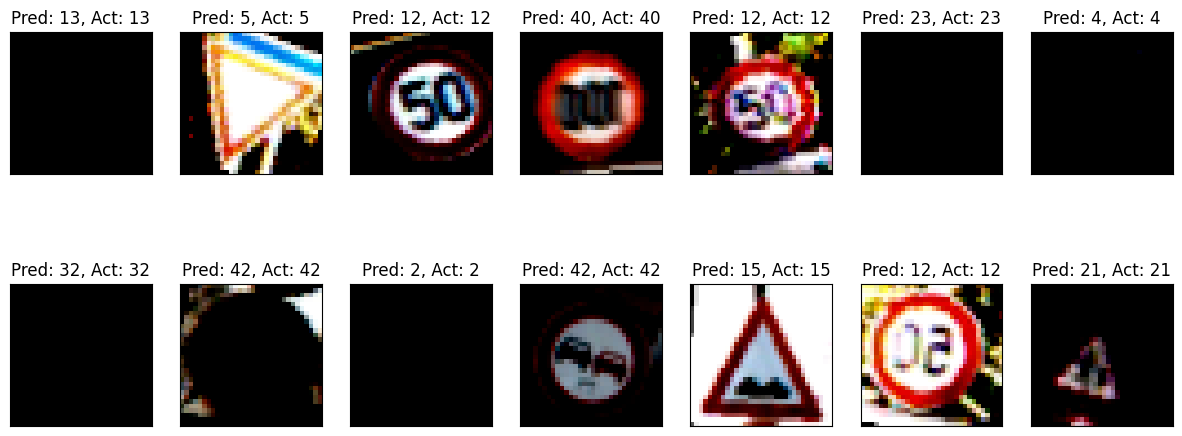

In [38]:
# Display predicted vs actual labels for a few samples
num_samples = 14
fig = plt.figure(figsize=(15, 6))

for idx in range(num_samples):
    ax = fig.add_subplot(2, num_samples//2, idx+1, xticks=[], yticks=[])
    img = all_images[idx].permute(1, 2, 0).numpy()
    ax.imshow(img)
    ax.set_title(f"Pred: {all_preds[idx].item()}, Act: {all_labels[idx].item()}")

plt.show()

# confusion matrix & visualization

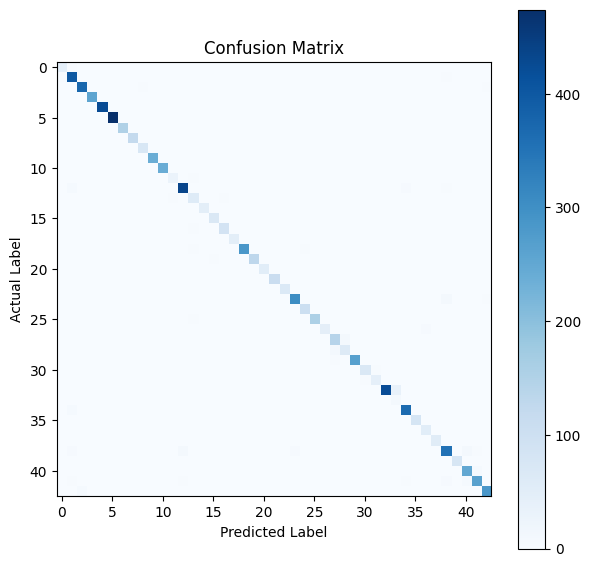

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(all_preds,all_labels)

plt.figure(figsize=(7, 7))
# Plot the confusion matrix
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
